In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

train = pd.read_csv("M:/TeamChallange/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("M:/TeamChallange/house-prices-advanced-regression-techniques/test.csv")
print("train (rows,cols):",train.shape)
print("test (rows,cols)",test.shape)

train (rows,cols): (1460, 81)
test (rows,cols) (1459, 80)


In [2]:
# remove the Id column
train.drop("Id", axis = 1, inplace = True)

In [3]:
#Removing not useful columns
train = train.drop('Utilities',axis=1)
test = test.drop('Utilities',axis=1)

train = train.drop('Street',axis=1)
test = test.drop('Street',axis=1)

train = train.drop('PoolQC',axis=1)
test = test.drop('PoolQC',axis=1)

In [4]:
# Handle missing values for features where median/mean or most common value doesn't make sense
#MSSubClass
train.loc[:, "MSSubClass"] = train.loc[:, "MSSubClass"].apply(str)
train.loc[:, "YrSold"] = train.loc[:, "YrSold"].astype(str)
train.loc[:, "MoSold"] = train.loc[:, "MoSold"].astype(str)
train.loc[:, "Exterior1st"] = train.loc[:, "Exterior1st"].fillna(train.loc[:, "Exterior1st"].mode()[0])
train.loc[:, "Exterior2nd"] = train.loc[:, "Exterior2nd"].fillna(train.loc[:, "Exterior2nd"].mode()[0])
train.loc[:, "SaleType"] = train.loc[:, "SaleType"].fillna(train.loc[:, "SaleType"].mode()[0])
train.loc[:, "SaleType"] = train.loc[:, "SaleType"].fillna(test.loc[:, "SaleType"].mode()[0])
train.loc[:, "haspool"] = train.loc[:, "PoolArea"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "has2ndfloor"] = train.loc[:, "2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasgarage"] = train.loc[:, "GarageArea"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasbsmt"] = train.loc[:, "TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasfireplace"] = train.loc[:, "Fireplaces"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "SqrtLotArea"] = np.sqrt(train.loc[:, "LotArea"])

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)
# TotalBsmtSF : NA most likely means no basement
train.loc[:, "TotalBsmtSF"] = train.loc[:, "TotalBsmtSF"].fillna(0)
train.loc[:, "BsmtFinSF1"] = train.loc[:, "BsmtFinSF1"].fillna(0)
train.loc[:, "BsmtFinSF2"] = train.loc[:, "BsmtFinSF2"].fillna(0)
#Electrical : NA most likely means no electricity in the house
train.loc[:, "Electrical"] = train.loc[:, "Electrical"].fillna("SBrkr")

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )
#repeat with test data
test.loc[:, "Alley"] = test.loc[:, "Alley"].fillna("None")
test.loc[:, "BedroomAbvGr"] = test.loc[:, "BedroomAbvGr"].fillna(0)
test.loc[:, "BsmtQual"] = test.loc[:, "BsmtQual"].fillna("No")
test.loc[:, "BsmtCond"] = test.loc[:, "BsmtCond"].fillna("No")
test.loc[:, "BsmtExposure"] = test.loc[:, "BsmtExposure"].fillna("No")
test.loc[:, "BsmtFinType1"] = test.loc[:, "BsmtFinType1"].fillna("No")
test.loc[:, "BsmtFinType2"] = test.loc[:, "BsmtFinType2"].fillna("No")
test.loc[:, "BsmtFullBath"] = test.loc[:, "BsmtFullBath"].fillna(0)
test.loc[:, "BsmtHalfBath"] = test.loc[:, "BsmtHalfBath"].fillna(0)
test.loc[:, "BsmtUnfSF"] = test.loc[:, "BsmtUnfSF"].fillna(0)
test.loc[:, "CentralAir"] = test.loc[:, "CentralAir"].fillna("N")
test.loc[:, "Condition1"] = test.loc[:, "Condition1"].fillna("Norm")
test.loc[:, "Condition2"] = test.loc[:, "Condition2"].fillna("Norm")
test.loc[:, "EnclosedPorch"] = test.loc[:, "EnclosedPorch"].fillna(0)
test.loc[:, "ExterCond"] = test.loc[:, "ExterCond"].fillna("TA")
test.loc[:, "ExterQual"] = test.loc[:, "ExterQual"].fillna("TA")
test.loc[:, "Fence"] = test.loc[:, "Fence"].fillna("No")
test.loc[:, "FireplaceQu"] = test.loc[:, "FireplaceQu"].fillna("No")
test.loc[:, "Fireplaces"] = test.loc[:, "Fireplaces"].fillna(0)
test.loc[:, "Functional"] = test.loc[:, "Functional"].fillna("Typ")
test.loc[:, "GarageType"] = test.loc[:, "GarageType"].fillna("No")
test.loc[:, "GarageFinish"] = test.loc[:, "GarageFinish"].fillna("No")
test.loc[:, "GarageQual"] = test.loc[:, "GarageQual"].fillna("No")
test.loc[:, "GarageCond"] = test.loc[:, "GarageCond"].fillna("No")
test.loc[:, "GarageArea"] = test.loc[:, "GarageArea"].fillna(0)
test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(0)
test.loc[:, "GarageYrBlt"] = test.loc[:, "GarageYrBlt"].fillna(0)
test.loc[:, "HalfBath"] = test.loc[:, "HalfBath"].fillna(0)
test.loc[:, "HeatingQC"] = test.loc[:, "HeatingQC"].fillna("TA")
test.loc[:, "KitchenAbvGr"] = test.loc[:, "KitchenAbvGr"].fillna(0)
test.loc[:, "KitchenQual"] = test.loc[:, "KitchenQual"].fillna("TA")
test.loc[:, "LotFrontage"] = test.loc[:, "LotFrontage"].fillna(0)
test.loc[:, "LotShape"] = test.loc[:, "LotShape"].fillna("Reg")
test.loc[:, "MasVnrType"] = test.loc[:, "MasVnrType"].fillna("None")
test.loc[:, "MasVnrArea"] = test.loc[:, "MasVnrArea"].fillna(0)
test.loc[:, "MiscFeature"] = test.loc[:, "MiscFeature"].fillna("No")
test.loc[:, "MiscVal"] = test.loc[:, "MiscVal"].fillna(0)
test.loc[:, "OpenPorchSF"] = test.loc[:, "OpenPorchSF"].fillna(0)
test.loc[:, "PavedDrive"] = test.loc[:, "PavedDrive"].fillna("N")
test.loc[:, "PoolArea"] = test.loc[:, "PoolArea"].fillna(0)
test.loc[:, "SaleCondition"] = test.loc[:, "SaleCondition"].fillna("Normal")
test.loc[:, "ScreenPorch"] = test.loc[:, "ScreenPorch"].fillna(0)
test.loc[:, "TotRmsAbvGrd"] = test.loc[:, "TotRmsAbvGrd"].fillna(0)
test.loc[:, "WoodDeckSF"] = test.loc[:, "WoodDeckSF"].fillna(0)
test.loc[:, "TotalBsmtSF"] = test.loc[:, "TotalBsmtSF"].fillna(0)
test.loc[:, "BsmtFinSF1"] = test.loc[:, "BsmtFinSF1"].fillna(0)
test.loc[:, "BsmtFinSF2"] = test.loc[:, "BsmtFinSF2"].fillna(0)
test.loc[:, "Electrical"] = test.loc[:, "Electrical"].fillna("None")
test.loc[:, "MSSubClass"] = test.loc[:, "MSSubClass"].apply(str)
test.loc[:, "YrSold"] = test.loc[:, "YrSold"].astype(str)
test.loc[:, "MoSold"] = test.loc[:, "MoSold"].astype(str)
test.loc[:, "Exterior1st"] = test.loc[:, "Exterior1st"].fillna(test.loc[:, "Exterior1st"].mode()[0])
test.loc[:, "Exterior2nd"] = test.loc[:, "Exterior2nd"].fillna(test.loc[:, "Exterior2nd"].mode()[0])
test.loc[:, "SaleType"] = test.loc[:, "SaleType"].fillna(test.loc[:, "SaleType"].mode()[0])
test.loc[:, "haspool"] = test.loc[:, "PoolArea"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "has2ndfloor"] = test.loc[:, "2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasgarage"] = test.loc[:, "GarageArea"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasbsmt"] = test.loc[:, "TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasfireplace"] = test.loc[:, "Fireplaces"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "SqrtLotArea"] = np.sqrt(test.loc[:, "LotArea"])

test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

test = test.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )

In [5]:
#creating new columns
train['YrBltAndRemod']=train['YearBuilt']+train['YearRemodAdd']
test['YrBltAndRemod']=test['YearBuilt']+test['YearRemodAdd']

train['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF']=test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

train['Total_sqr_footage'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] +
                                 train['1stFlrSF'] + train['2ndFlrSF'])
test['Total_sqr_footage'] = (test['BsmtFinSF1'] + test['BsmtFinSF2'] +
                                 test['1stFlrSF'] + test['2ndFlrSF'])

train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] + train['ScreenPorch'] +
                              train['WoodDeckSF'])
test['Total_porch_sf'] = (test['OpenPorchSF'] + test['3SsnPorch'] +
                              test['EnclosedPorch'] + test['ScreenPorch'] +
                              test['WoodDeckSF'])

train["1stFlrSF_2ndFlr_Sf"] = (train["1stFlrSF"] + train["2ndFlrSF"])
test["1stFlrSF_2ndFlr_Sf"] = (test["1stFlrSF"] + test["2ndFlrSF"])

In [6]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 61
Categorical features : 27


In [7]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


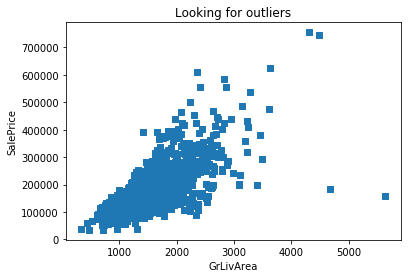

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#checking for any outliers
plt.scatter(train.GrLivArea, train.SalePrice, marker="s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [9]:
#There seem to be outliers where the size of the house is larger than 4000 sq. ft
#It would be best to remove them
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)

In [10]:
#Look at the correlation to sale price and select the top 10 for the model
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice             1.000
TotalSF               0.825
OverallQual           0.801
Total_sqr_footage     0.747
1stFlrSF_2ndFlr_Sf    0.730
GrLivArea             0.721
ExterQual             0.695
KitchenQual           0.666
GarageCars            0.649
TotalBsmtSF           0.647
GarageArea            0.637
Total_Bathrooms       0.636
1stFlrSF              0.625
BsmtQual              0.592
YrBltAndRemod         0.591
FullBath              0.559
TotRmsAbvGrd          0.537
YearBuilt             0.535
FireplaceQu           0.529
YearRemodAdd          0.521
hasfireplace          0.481
MasVnrArea            0.474
Fireplaces            0.467
HeatingQC             0.435
Total_porch_sf        0.397
BsmtFinSF1            0.396
SqrtLotArea           0.374
BsmtExposure          0.360
OpenPorchSF           0.330
WoodDeckSF            0.323
                      ...  
HalfBath              0.283
GarageQual            0.281
GarageCond            0.270
LotArea               0.270
GarageYrBlt         

In [11]:
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Use root mean square error for checking the error
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split

#Select all features above 0.100
features = ["TotalSF","OverallQual","Total_sqr_footage","1stFlrSF_2ndFlr_Sf","GrLivArea","ExterQual","KitchenQual","GarageCars","TotalBsmtSF","GarageArea","Total_Bathrooms","1stFlrSF","BsmtQual","YrBltAndRemod","FullBath","TotRmsAbvGrd","YearBuilt","FireplaceQu","YearRemodAdd","hasfireplace","MasVnrArea","Fireplaces","HeatingQC","Total_porch_sf","BsmtFinSF1","SqrtLotArea","BsmtExposure","OpenPorchSF","WoodDeckSF","BsmtFinType1","2ndFlrSF","HalfBath","GarageQual","GarageCond","LotArea","hasgarage","PavedDrive","BsmtFullBath","BsmtUnfSF","BsmtCond","LotFrontage","BedroomAbvGr","hasbsmt","has2ndfloor","ScreenPorch","Functional"]
X = train[features]
#debug: NA finding
#print(X[X.isnull().any(axis=1)])
#X[X.isnull().any(axis=1)].to_csv("NAs.csv",index=False)

In [13]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

# Use 80% of the train data to test the model, then check using the remaining 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1164, 46)
X_test : (292, 46)
y_train : (1164,)
y_test : (292,)


In [14]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# create the linear regression model using the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate the root mean square error on the train and test data
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 0.13163022795528204
RMSE on Test set : 0.12326786047019851


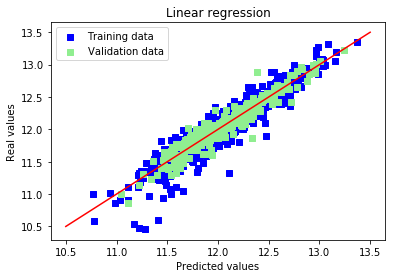

In [15]:
# Show a plot of the training and test data and the linear model used to predict it
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [16]:
# Generate test data
X_final = test[features]

output = test[["Id"]]
#output data to CSV file
output["SalePrice"] = np.expm1(lr.predict(X_final))
print(output) #sanity check values
output[["Id","SalePrice"]].to_csv("output.csv",index=False)

        Id  SalePrice
0     1461 120892.004
1     1462 161768.180
2     1463 180696.833
3     1464 194822.786
4     1465 189436.267
5     1466 169329.577
6     1467 172082.799
7     1468 160907.318
8     1469 195238.791
9     1470 113642.142
10    1471 201682.417
11    1472 106982.067
12    1473 102113.307
13    1474 143173.333
14    1475 117606.629
15    1476 339724.883
16    1477 227768.211
17    1478 285478.065
18    1479 277974.023
19    1480 531157.948
20    1481 325655.601
21    1482 211456.427
22    1483 184259.603
23    1484 166572.253
24    1485 194675.417
25    1486 203818.390
26    1487 329041.468
27    1488 233555.816
28    1489 181439.397
29    1490 235903.605
...    ...        ...
1429  2890  79978.836
1430  2891 142868.288
1431  2892  61849.341
1432  2893  91818.107
1433  2894  62879.434
1434  2895 297834.491
1435  2896 268506.816
1436  2897 199957.171
1437  2898 160884.880
1438  2899 210695.178
1439  2900 151303.478
1440  2901 226527.969
1441  2902 196137.993
1442  2903

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
